In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
sns.set(font_scale=1)

In [3]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
import plotly.express as px
import plotly.graph_objects as go

In [7]:
def create_kto_data(yy,mm):
    # 엑셀파일 경로 설정
    #file_path = f'../../data/dataset/tourists/kto_{yy}{mm}.xlsx'
    file_path = '../../data/dataset/tourists/kto_{}{}.xlsx'.format(yy,mm)
    df = pd.read_excel(file_path, skiprows=1, skipfooter=4, usecols='A:G')
    
    # 기준년월 컬럼 추가
    df['기준년월'] = '{}-{}'.format(yy,mm)
    
    # 아시아주, 미주, 구주, 대양주, 아프리카주, 기타대륙, 교포소계 제거
    contients_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    df_country = df[~df['국적'].isin(contients_list)]
    
    # 인덱스 확인
    df_country.reset_index(inplace=True, drop=True)
    
    # 대륙 컬럼 생성
    continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + \
                 ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    
    # 국가별 관광객 비율
    df_country['관광객비율(%)'] = round(df_country['관광'] / df_country['계'] * 100, 1)
    
    # 전체 비율
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100 ,1)
    
    return df_country

In [8]:
# 함수 테스트

kto_test = create_kto_data(2018,12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


#### 반복문 -> 모든 엑셀 파일을 읽은 후 합치기

In [11]:
for yy in range(2010,2021): # 2010 ~ 2020
    for mm in range(1,13):
        str_mm = str(mm).zfill(2) # zfill(2) : 0을 포함하여 2자리로 출력
        yymm = '{}{}'.format(yy,str_mm)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012


In [12]:
df = pd.DataFrame()

for yy in range(2010,2021): # 2010 ~ 2020
    for mm in range(1,13):
        
        try:
            str_mm = str(mm).zfill(2) # zfill(2) : 0을 포함하여 2자리로 출력
            temp_df = create_kto_data(str(yy),str_mm)
            
            df = pd.concat([df,temp_df], ignore_index=True)
        except:
            pass # 202006 ~ 202012 에러나는 부분 처리         

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


#### 전체 정보를 엑셀파일로 저장

In [14]:
df.to_excel('../../data/dataset/tourists/kto_total.xlsx',index=False)

#### 기준년월 데이터 타입 변경(datetime)

In [15]:
df['기준년월'] = pd.to_datetime(df['기준년월'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   국적        7500 non-null   object        
 1   관광        7500 non-null   int64         
 2   상용        7500 non-null   int64         
 3   공용        7500 non-null   int64         
 4   유학/연수     7500 non-null   int64         
 5   기타        7500 non-null   int64         
 6   계         7500 non-null   int64         
 7   기준년월      7500 non-null   datetime64[ns]
 8   대륙        7500 non-null   object        
 9   관광객비율(%)  7500 non-null   float64       
 10  전체비율(%)   7500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 644.7+ KB


#### 년도, 월 컬럼 생성

In [20]:
df['년도'] = df['기준년월'].dt.year
df['월'] = df['기준년월'].dt.month

In [25]:
df.tail(3)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
7497,아프리카 기타,3,1,3,6,118,131,2020-05-01,아프리카,2.3,0.0,2020,5
7498,국적미상,1,0,0,0,3,4,2020-05-01,기타대륙,25.0,0.0,2020,5
7499,교포,0,0,0,0,790,790,2020-05-01,교포,0.0,0.0,2020,5


In [24]:
df.head(3)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01-01,아시아,97.0,50.6,2010,1
1,대만,35788,41,17,37,516,36399,2010-01-01,아시아,98.3,8.9,2010,1
2,홍콩,13874,55,0,21,595,14545,2010-01-01,아시아,95.4,3.5,2010,1


#### 국적인 중국인 자료

In [29]:
df_filter = df[df['국적'] == '중국']
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01-01,아시아,44.3,10.1,2010,1
77,중국,60590,7907,68,29546,42460,140571,2010-02-01,아시아,43.1,13.6,2010,2
137,중국,50330,13549,174,14924,62480,141457,2010-03-01,아시아,35.6,9.2,2010,3
197,중국,84252,13306,212,2199,47711,147680,2010-04-01,아시아,57.1,15.5,2010,4
257,중국,89056,12325,360,2931,49394,154066,2010-05-01,아시아,57.8,17.0,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01-01,아시아,81.7,38.2,2020,1
7277,중국,49520,715,11,20753,33087,104086,2020-02-01,아시아,47.6,9.8,2020,2
7337,중국,5040,115,2,7388,4050,16595,2020-03-01,아시아,30.4,16.0,2020,3
7397,중국,522,71,0,1112,2230,3935,2020-04-01,아시아,13.3,10.2,2020,4


In [30]:
file_path = '../../data/dataset/tourists/[국적별 관광객 데이터] 중국.xlsx'

df_filter.to_excel(file_path, index=False)

#### 국절별로 위 작업을 할 경우?

In [32]:
df['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [33]:
for cntry in df['국적'].unique():
    
    df_filter = df[df['국적'] == cntry]
    
    file_path = '../../data/dataset/tourists/[국적별 관광객 데이터] {}.xlsx'.format(cntry)

    df_filter.to_excel(file_path, index=False)

#### 중국 관광객 시각화

In [44]:
# 중국, 컬럼(관광, 기준년월)

df_china = df.loc[df['국적'] == '중국', ['관광','기준년월']]
df_china

,관광,기준년월
17,40425,2010-01-01
77,60590,2010-02-01
137,50330,2010-03-01
197,84252,2010-04-01
257,89056,2010-05-01
...,...,...
7217,393336,2020-01-01
7277,49520,2020-02-01
7337,5040,2020-03-01
7397,522,2020-04-01


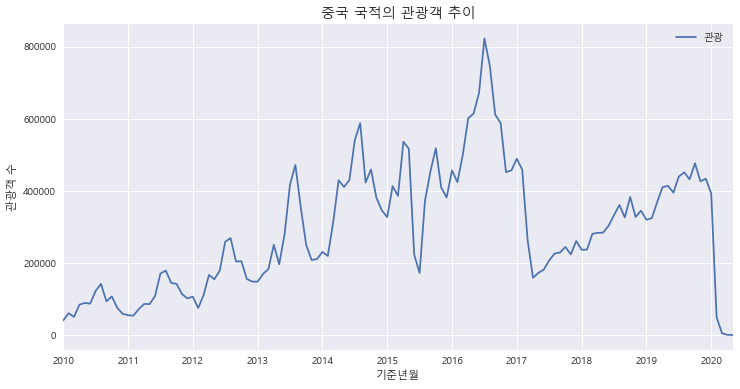

In [46]:
ax = df_china.plot(x='기준년월',y='관광',figsize=(12,6),ylabel='관광객 수')
ax.set_title('중국 국적의 관광객 추이',size=14);

- 2010 ~ 2016 관광객 수가 꾸준히 증가
- 2015 여름에 관광객 수 급감(메르스)
- 2017 관광객 수 급감(사드 배치로 인한 관광 중지)
- 2020 초 관광객 수 급감(코로나)

#### 국적별 관광객 비율 상위 5개국

In [51]:
# df.sort_values('관광객비율(%)',ascending=False).head(5)

top5 = df.groupby('국적')[['관광']].sum().sort_values('관광',ascending=False).head()
top5

,관광
국적,
중국,36091652
일본,27011467
대만,7222786
미국,6112950
홍콩,5005868


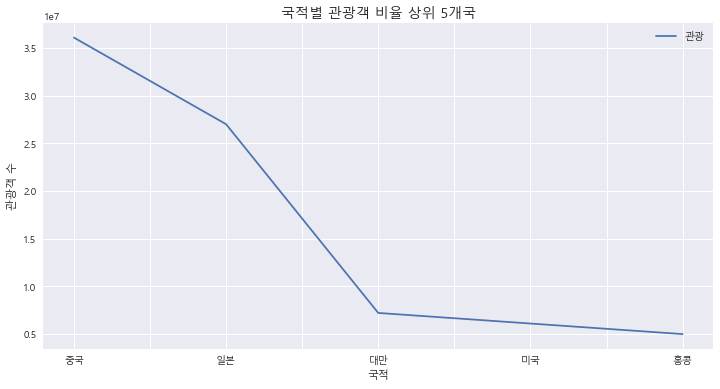

In [53]:
ax = top5.plot(y='관광',figsize=(12,6),ylabel='관광객 수')
ax.set_title('국적별 관광객 비율 상위 5개국',size=14);

In [54]:
top5_country = df.loc[df['국적'].isin(top5.index)]

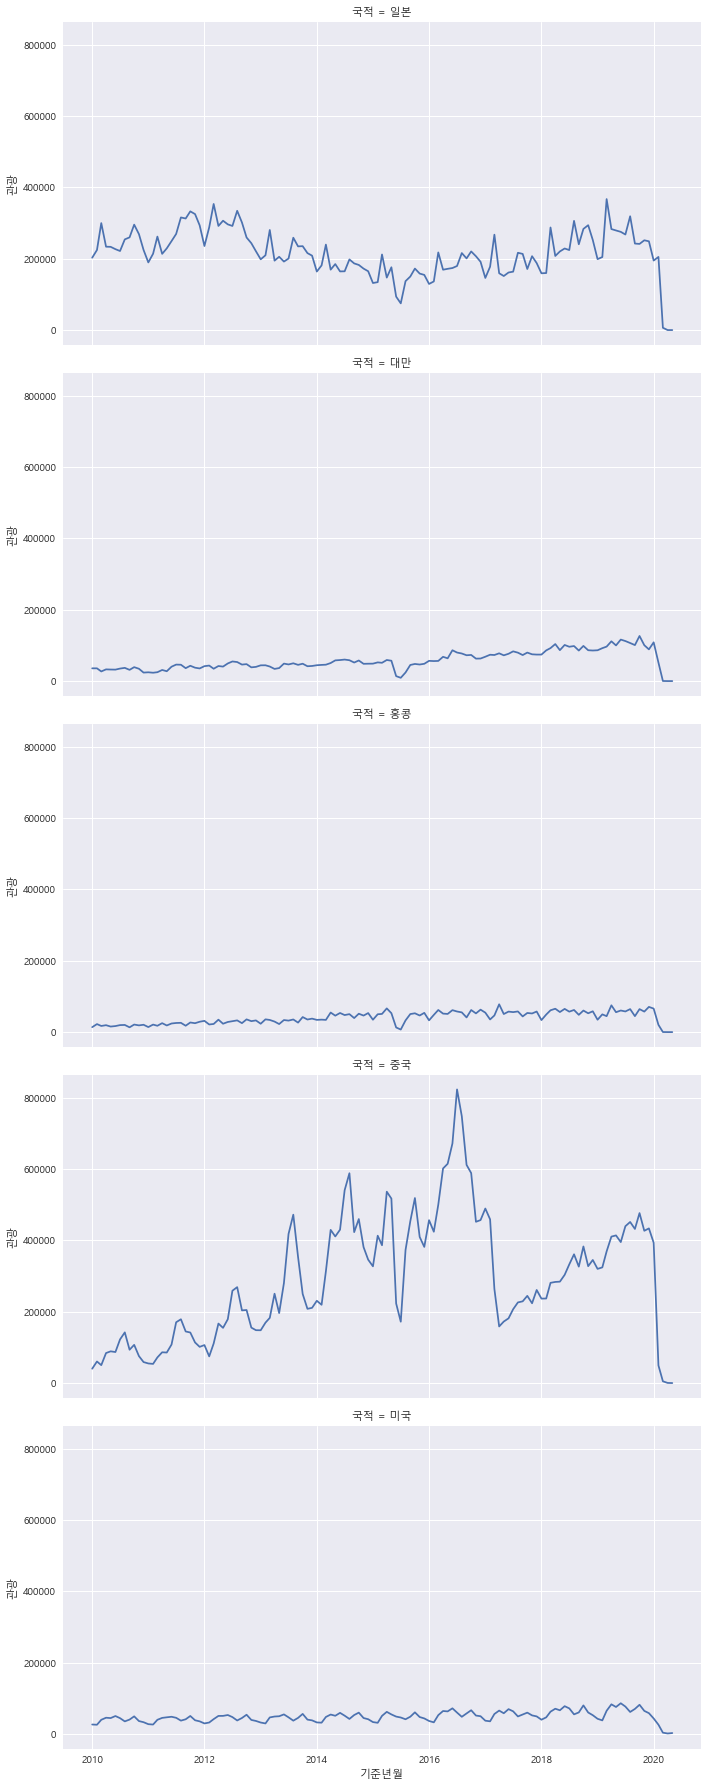

In [57]:
sns.relplot(data=top5_country, x='기준년월', y='관광', col='국적',kind='line', col_wrap=1, aspect=2);

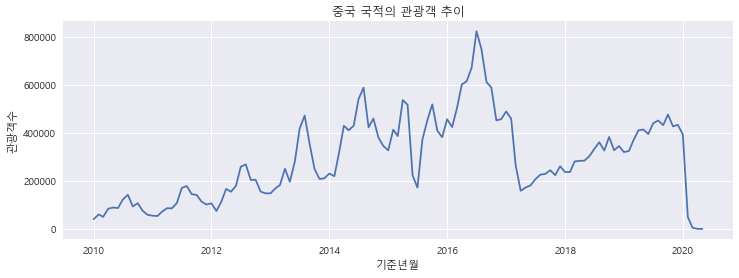

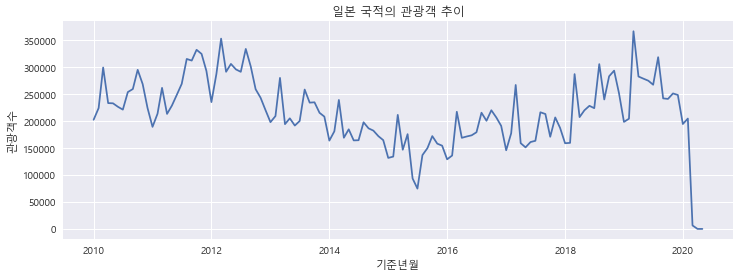

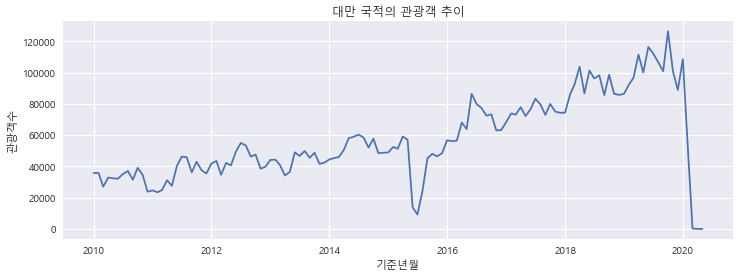

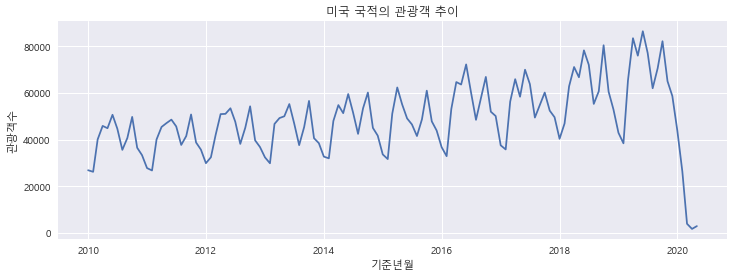

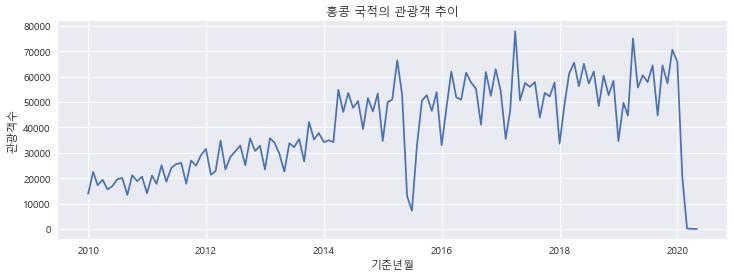

In [58]:
for cntry in top5.index:
    # 상위 5개국 데이터 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    plt.figure(figsize=(12,4))
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    
    plt.title(f'{cntry} 국적의 관광객 추이')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

#### 히트맵

In [63]:
china_pivot = df.loc[df['국적'] == '중국'].pivot_table(index='년도',columns='월', values='관광')
china_pivot

월,1,2,3,4,5,6,7,8,9,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


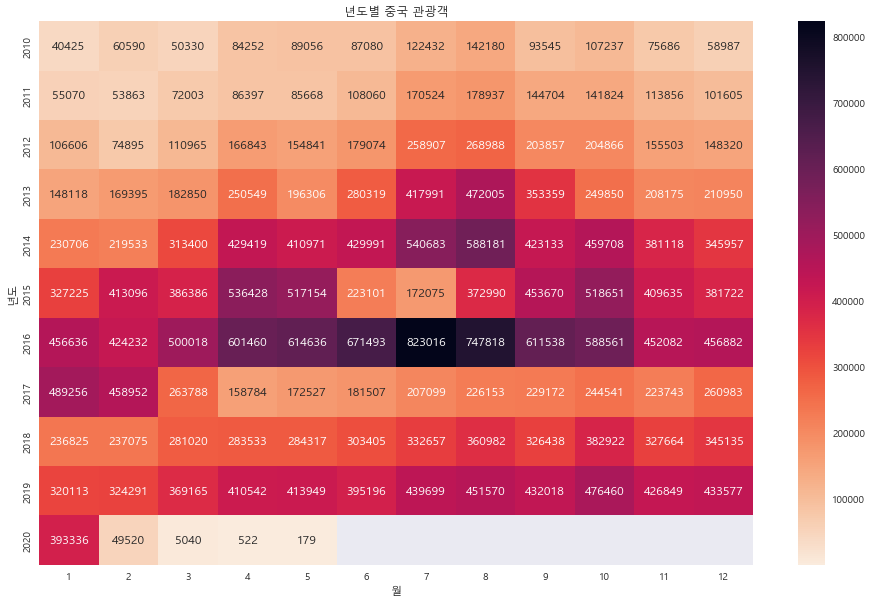

In [65]:
plt.figure(figsize=(16,10))
sns.heatmap(data=china_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.title('년도별 중국 관광객');

#### 상위 5개국

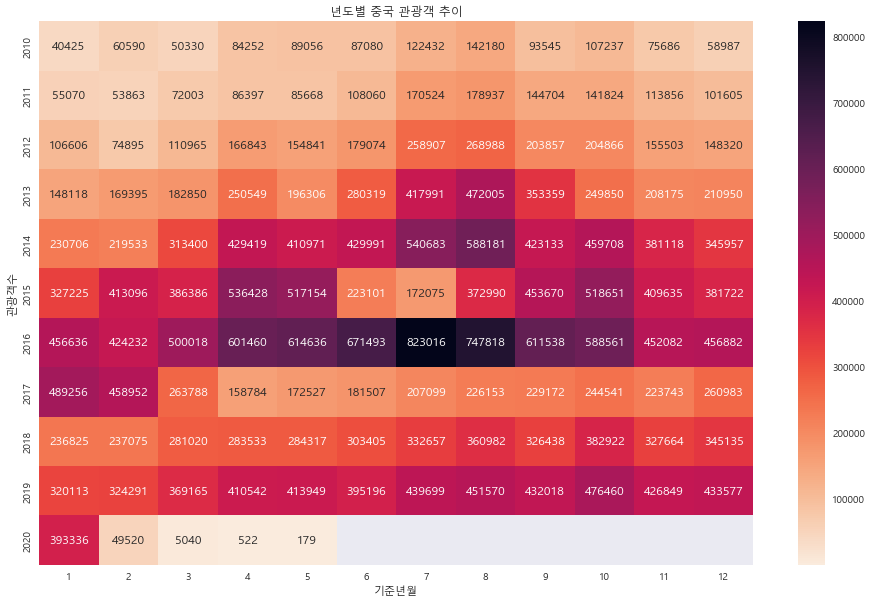

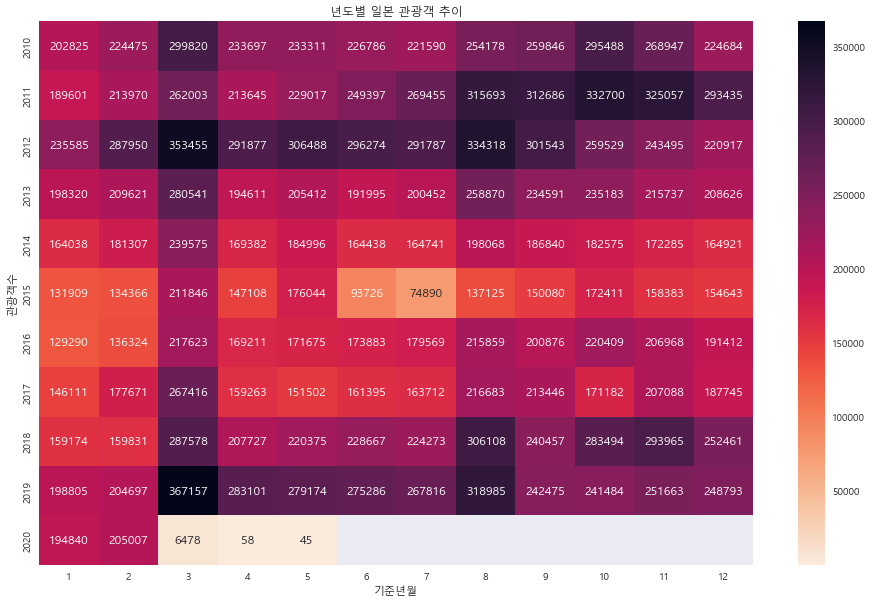

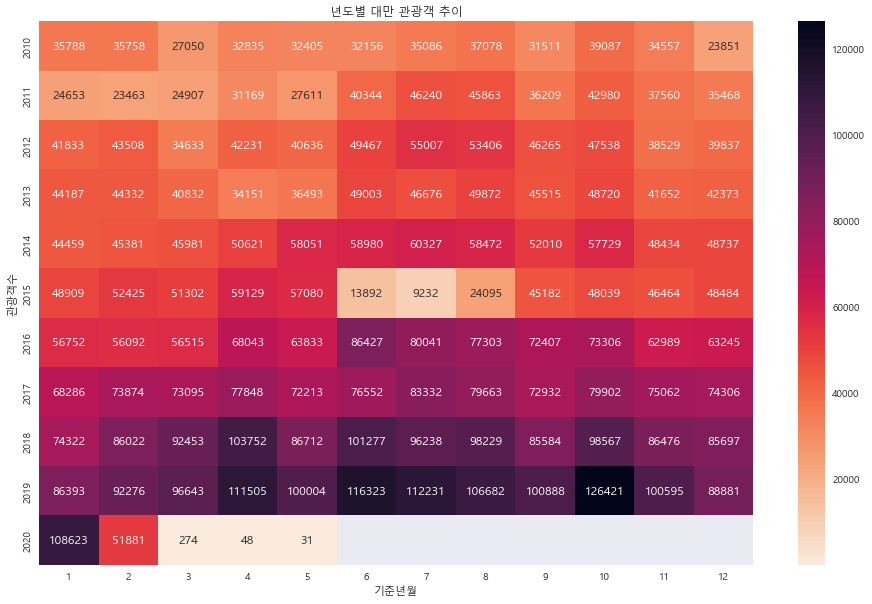

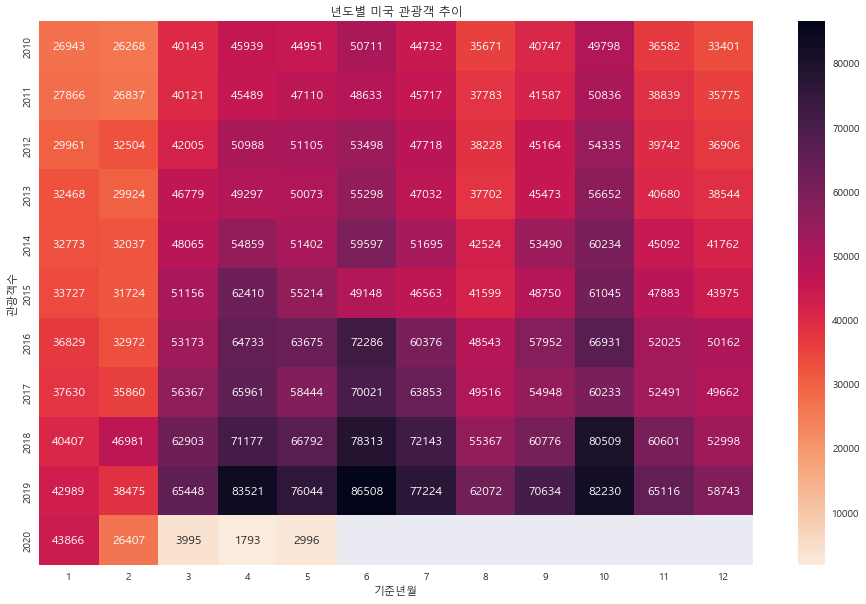

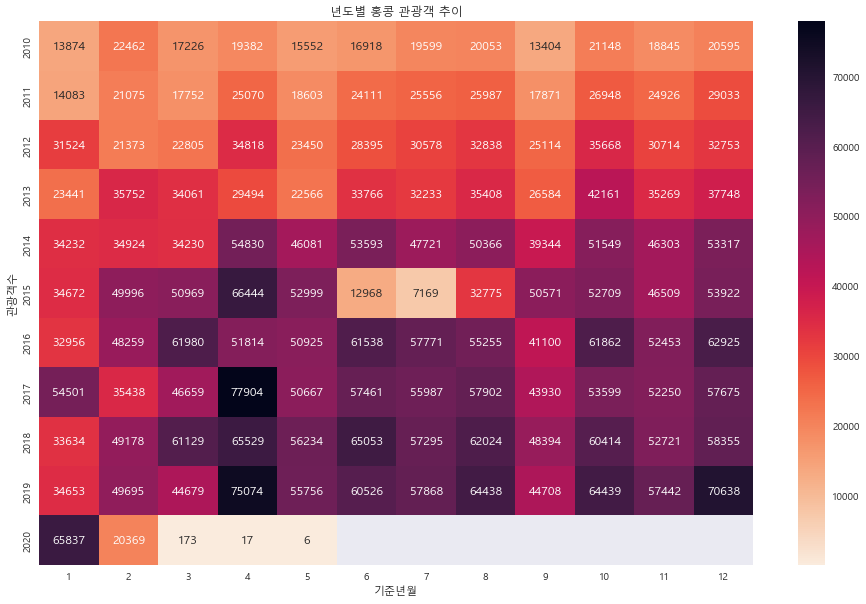

In [68]:
for contry in top5.index:
    condition = (df['국적'] == contry)
    df_filter = df[condition]
    
    plt.figure(figsize=(16,10))
    
    df_pivot = df_filter.pivot_table(values='관광',index='년도', columns='월')
    
    sns.heatmap(data=df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
    plt.title(f'년도별 {contry} 관광객 추이')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수');